# Kaggle Home Credit

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('application_train.csv',encoding='utf-8')
test=pd.read_csv('application_test.csv',encoding='utf-8')
submit=pd.read_csv('sample_submission.csv',encoding='utf-8')

In [3]:
train.shape

(307511, 122)

In [4]:
test.shape

(48744, 121)

In [5]:
data=train.append(test)
data.shape

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


(356255, 122)

# Data Analysis

### 1.1 Check the missing values.

In [6]:
pd.set_option('display.width', 1000, 'display.max_rows', 1000)
data.apply(lambda x:sum(x.isnull()))

AMT_ANNUITY                         36
AMT_CREDIT                           0
AMT_GOODS_PRICE                    278
AMT_INCOME_TOTAL                     0
AMT_REQ_CREDIT_BUREAU_DAY        47568
AMT_REQ_CREDIT_BUREAU_HOUR       47568
AMT_REQ_CREDIT_BUREAU_MON        47568
AMT_REQ_CREDIT_BUREAU_QRT        47568
AMT_REQ_CREDIT_BUREAU_WEEK       47568
AMT_REQ_CREDIT_BUREAU_YEAR       47568
APARTMENTS_AVG                  179948
APARTMENTS_MEDI                 179948
APARTMENTS_MODE                 179948
BASEMENTAREA_AVG                207584
BASEMENTAREA_MEDI               207584
BASEMENTAREA_MODE               207584
CNT_CHILDREN                         0
CNT_FAM_MEMBERS                      2
CODE_GENDER                          0
COMMONAREA_AVG                  248360
COMMONAREA_MEDI                 248360
COMMONAREA_MODE                 248360
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_ID_PUBLISH                      0
DAYS_LAST_PHONE_CHANGE   

### 1.2 Delete the missing which is over 50,000.

In [7]:
X=data.apply(lambda x:sum(x.isnull()))
feature_selection=[]
for j in range(len(data.columns)):
    if X.values[j]<=50000:
        feature_selection.append(X.index[j])
len(feature_selection)

71

In [8]:
feature_selection

['AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'CODE_GENDER',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_EMAIL',
 'FLAG_EMP_PHONE',
 'FLAG_MOBIL',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALT

In [9]:
pd.set_option('display.width', 1000, 'display.max_rows', 1000)
data2=data[feature_selection]
data2.apply(lambda x:sum(x.isnull()))

AMT_ANNUITY                       36
AMT_CREDIT                         0
AMT_GOODS_PRICE                  278
AMT_INCOME_TOTAL                   0
AMT_REQ_CREDIT_BUREAU_DAY      47568
AMT_REQ_CREDIT_BUREAU_HOUR     47568
AMT_REQ_CREDIT_BUREAU_MON      47568
AMT_REQ_CREDIT_BUREAU_QRT      47568
AMT_REQ_CREDIT_BUREAU_WEEK     47568
AMT_REQ_CREDIT_BUREAU_YEAR     47568
CNT_CHILDREN                       0
CNT_FAM_MEMBERS                    2
CODE_GENDER                        0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_ID_PUBLISH                    0
DAYS_LAST_PHONE_CHANGE             1
DAYS_REGISTRATION                  0
DEF_30_CNT_SOCIAL_CIRCLE        1050
DEF_60_CNT_SOCIAL_CIRCLE        1050
EXT_SOURCE_2                     668
FLAG_CONT_MOBILE                   0
FLAG_DOCUMENT_10                   0
FLAG_DOCUMENT_11                   0
FLAG_DOCUMENT_12                   0
FLAG_DOCUMENT_13                   0
FLAG_DOCUMENT_14                   0
F

### 1.3 Data Cleaning

In [10]:
data2['TARGET'].value_counts(normalize=True)

0.0    0.919271
1.0    0.080729
Name: TARGET, dtype: float64

The person who had late payment is about 8%.

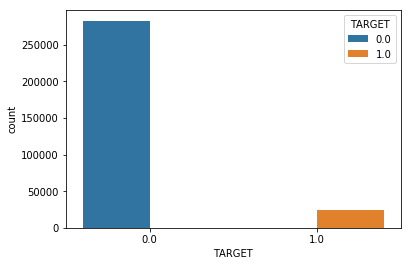

In [11]:
sns.countplot(data2['TARGET'],hue=data['TARGET'])

In [12]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 48743
Data columns (total 71 columns):
AMT_ANNUITY                    356219 non-null float64
AMT_CREDIT                     356255 non-null float64
AMT_GOODS_PRICE                355977 non-null float64
AMT_INCOME_TOTAL               356255 non-null float64
AMT_REQ_CREDIT_BUREAU_DAY      308687 non-null float64
AMT_REQ_CREDIT_BUREAU_HOUR     308687 non-null float64
AMT_REQ_CREDIT_BUREAU_MON      308687 non-null float64
AMT_REQ_CREDIT_BUREAU_QRT      308687 non-null float64
AMT_REQ_CREDIT_BUREAU_WEEK     308687 non-null float64
AMT_REQ_CREDIT_BUREAU_YEAR     308687 non-null float64
CNT_CHILDREN                   356255 non-null int64
CNT_FAM_MEMBERS                356253 non-null float64
CODE_GENDER                    356255 non-null object
DAYS_BIRTH                     356255 non-null int64
DAYS_EMPLOYED                  356255 non-null int64
DAYS_ID_PUBLISH                356255 non-null int64
DAYS_LAST_PHONE_CHA

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


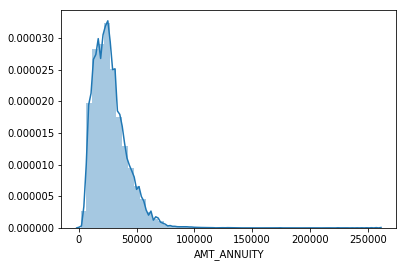

In [13]:
sns.distplot(data2.AMT_ANNUITY.dropna(), kde=True,bins=50)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


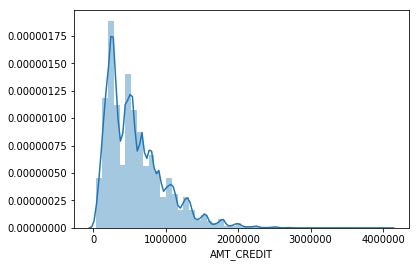

In [14]:
sns.distplot(data2.AMT_CREDIT.dropna(), kde=True,bins=50)

In [15]:
median=data2.AMT_ANNUITY.median()
data2.AMT_ANNUITY=data2.AMT_ANNUITY.fillna(median)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


#### Create new feature: TERM 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


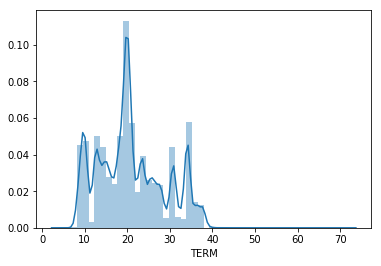

In [16]:
data2['TERM']=data2.AMT_CREDIT/data2.AMT_ANNUITY
sns.distplot(data2.TERM.dropna(), kde=True,bins=50)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


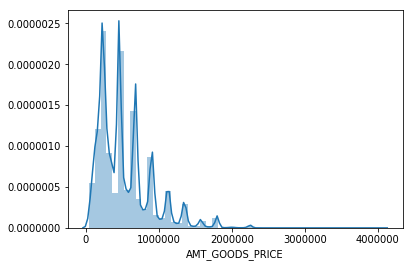

In [17]:
sns.distplot(data2.AMT_GOODS_PRICE.dropna(), kde=True,bins=50)

In [18]:
median=data2.AMT_GOODS_PRICE.median()
data2.AMT_GOODS_PRICE=data2.AMT_GOODS_PRICE.fillna(median)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


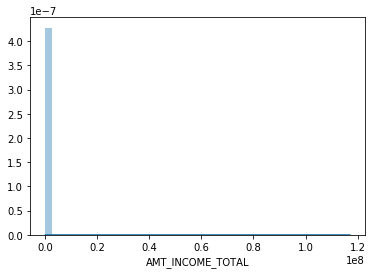

In [19]:
sns.distplot(data2.AMT_INCOME_TOTAL.dropna(), kde=True,bins=50)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


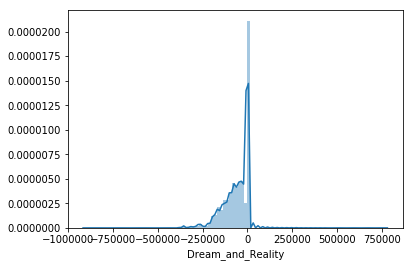

In [20]:
data2['Dream_and_Reality']=data2.AMT_GOODS_PRICE-data2.AMT_CREDIT
sns.distplot(data2.Dream_and_Reality.dropna(), kde=True,bins=100)

#### Create new feature: Over_Expected

In [21]:
data2['Over_Expected']=(data2.Dream_and_Reality>0).map({True:1,False:0})
data2.Over_Expected.value_counts()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    355744
1       511
Name: Over_Expected, dtype: int64

#### Create new feature: AMT_REQ

In [22]:
data2['AMT_REQ']=data2.AMT_REQ_CREDIT_BUREAU_HOUR*6+data2.AMT_REQ_CREDIT_BUREAU_DAY*5+data2.AMT_REQ_CREDIT_BUREAU_WEEK*4+data2.AMT_REQ_CREDIT_BUREAU_MON*3+data2.AMT_REQ_CREDIT_BUREAU_QRT*2+data2.AMT_REQ_CREDIT_BUREAU_YEAR

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


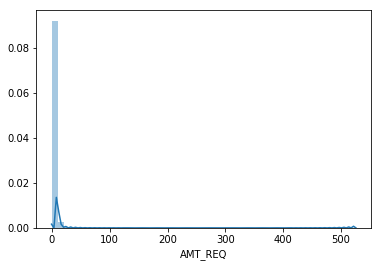

In [23]:
sns.distplot(data2.AMT_REQ.dropna())

In [24]:
median=data2.AMT_REQ.median()
data2.AMT_REQ=data2.AMT_REQ.fillna(median)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


#### Create new feature: Family_Size

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


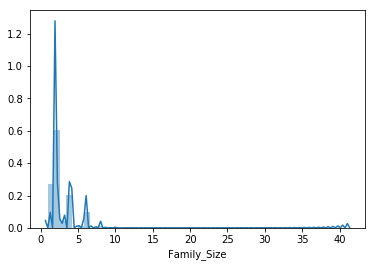

In [25]:
data2['Family_Size']=data2.CNT_CHILDREN+data2.CNT_FAM_MEMBERS
sns.distplot(data2.Family_Size.dropna(),bins=50)

In [26]:
median=data2.Family_Size.median()
data2.Family_Size=data2.Family_Size.fillna(median)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [27]:
data2.CODE_GENDER.value_counts()

F      235126
M      121125
XNA         4
Name: CODE_GENDER, dtype: int64

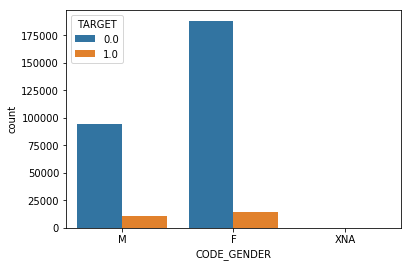

In [28]:
sns.countplot(data2['CODE_GENDER'],hue=data['TARGET'])

In [29]:
data2['CODE_GENDER'].replace('XNA','F',inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


XNA is only 4 counts and F is larger than M,so I put them as F.

#### Create a new feature: Day_Score

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


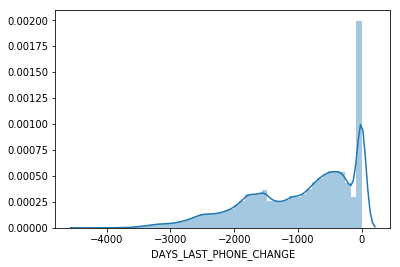

In [30]:
sns.distplot(data2.DAYS_LAST_PHONE_CHANGE.dropna())

In [31]:
median=data2.DAYS_LAST_PHONE_CHANGE.median()
data2.DAYS_LAST_PHONE_CHANGE=data2.DAYS_LAST_PHONE_CHANGE.fillna(median)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [32]:
data2['DAYS_Sum']=abs(data2.iloc[:,13:18].sum(axis=1))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


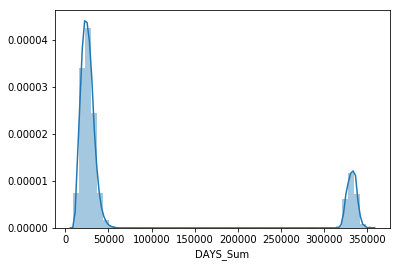

In [33]:
sns.distplot(data2.DAYS_Sum.dropna())

感覺可以分成兩群就好

In [34]:
median=data2.DAYS_Sum.median()
median

27122.0

In [35]:
data['DAYS_Sum_Flag']=(data2.DAYS_Sum>=median).map({True:1,False:0})
data.DAYS_Sum_Flag.value_counts()

1    178143
0    178112
Name: DAYS_Sum_Flag, dtype: int64

搞不懂這兩個變數，先不使用

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


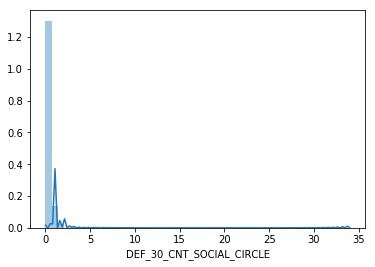

In [36]:
sns.distplot(data2.DEF_30_CNT_SOCIAL_CIRCLE.dropna())

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


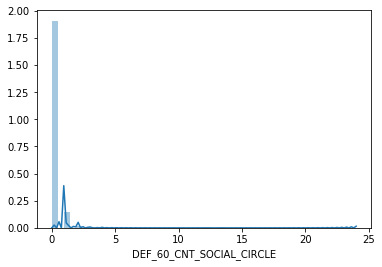

In [37]:
sns.distplot(data2.DEF_60_CNT_SOCIAL_CIRCLE.dropna())

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


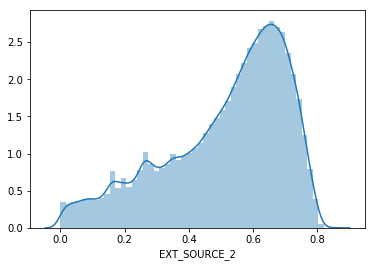

In [38]:
sns.distplot(data2.EXT_SOURCE_2.dropna())

In [39]:
median=data2.EXT_SOURCE_2.median()
data2.EXT_SOURCE_2=data2.EXT_SOURCE_2.fillna(median)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [40]:
data2['FLAG_OWN_CAR']=data2['FLAG_OWN_CAR'].map({'Y':1,'N':0}).astype('int')
data2['FLAG_OWN_REALTY']=data2['FLAG_OWN_REALTY'].map({'Y':1,'N':0}).astype('int')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Create a new feature:Flag_Sum

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


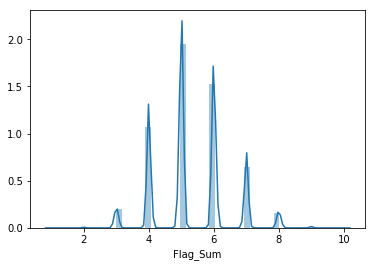

In [41]:
data2['Flag_Sum']=data2.iloc[:,21:49].sum(axis=1)
sns.distplot(data2.Flag_Sum.dropna())

In [42]:
data2.Flag_Sum.value_counts()

5     124913
6      97605
4      68259
7      41409
3      12539
8      10450
9        693
2        376
10         8
1          3
Name: Flag_Sum, dtype: int64

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


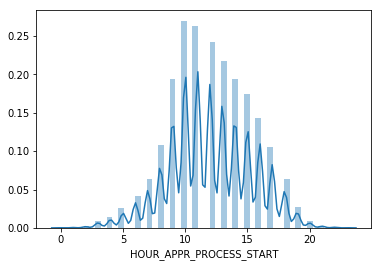

In [43]:
sns.distplot(data2.HOUR_APPR_PROCESS_START.dropna())

In [44]:
bins = [min(data2.HOUR_APPR_PROCESS_START)-1,5,10,15,20,max(data2.HOUR_APPR_PROCESS_START)+1]
labels = [ '0-5', '6-10', '11-15','16-20','21-24']
data2['HOUR']=pd.cut(data2.HOUR_APPR_PROCESS_START, bins, right=False, labels=labels)
data2.HOUR.value_counts()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


11-15    194563
16-20     84316
6-10      70910
0-5        4359
21-24      2107
Name: HOUR, dtype: int64

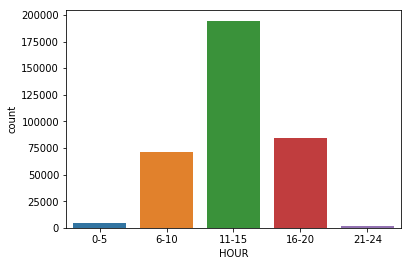

In [45]:
sns.countplot(data2.HOUR.dropna())

In [46]:
data2.groupby(['HOUR_APPR_PROCESS_START'])['TARGET'].aggregate('mean')

HOUR_APPR_PROCESS_START
0     0.150000
1     0.081395
2     0.098361
3     0.086992
4     0.082775
5     0.105827
6     0.110407
7     0.100427
8     0.090765
9     0.082055
10    0.080218
11    0.080744
12    0.082581
13    0.080267
14    0.079077
15    0.075929
16    0.074614
17    0.064899
18    0.070173
19    0.068607
20    0.070234
21    0.061728
22    0.100000
23    0.121951
Name: TARGET, dtype: float64

In [47]:
data2.groupby(['HOUR'])['TARGET'].aggregate('mean')

HOUR
0-5      0.086110
6-10     0.091080
11-15    0.080638
16-20    0.072212
21-24    0.071987
Name: TARGET, dtype: float64

#### Create a new feature: Houe_Score

In [48]:
data2['HOUR_Score']=data2['HOUR'].map({'11-15':5,'16-20':4,'6-10':3,'0-5':2,'21-24':1}).astype('int')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Create a new feature: Live_Score

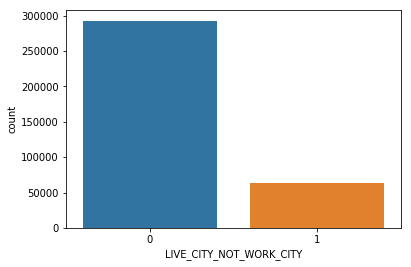

In [49]:
sns.countplot(data2.LIVE_CITY_NOT_WORK_CITY.dropna())

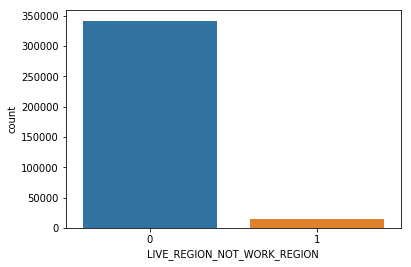

In [50]:
sns.countplot(data2.LIVE_REGION_NOT_WORK_REGION.dropna())

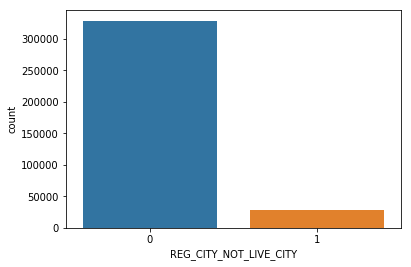

In [51]:
sns.countplot(data2.REG_CITY_NOT_LIVE_CITY.dropna())

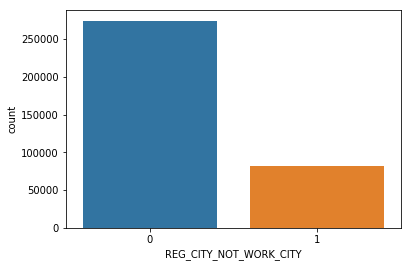

In [52]:
sns.countplot(data2.REG_CITY_NOT_WORK_CITY.dropna())

In [53]:
data2['Live_Score']=data2.loc[:,['LIVE_CITY_NOT_WORK_CITY','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY']].sum(axis=1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
data2.Live_Score.value_counts()

0    265630
2     71195
3     11578
1      6880
4       972
Name: Live_Score, dtype: int64

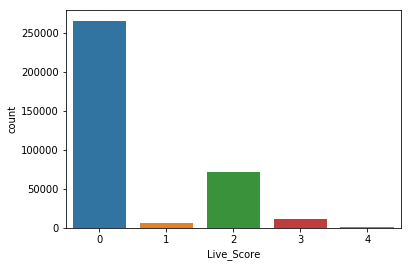

In [55]:
sns.countplot(data2.Live_Score.dropna())

In [56]:
data2.NAME_CONTRACT_TYPE.value_counts()

Cash loans         326537
Revolving loans     29718
Name: NAME_CONTRACT_TYPE, dtype: int64

In [57]:
data2.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    252379
Higher education                  87379
Incomplete higher                 12001
Lower secondary                    4291
Academic degree                     205
Name: NAME_EDUCATION_TYPE, dtype: int64

#### Create a new feature: NAME_EDUCATION_TYPE_Score

In [58]:
data2['NAME_EDUCATION_TYPE_Score']=data2['NAME_EDUCATION_TYPE'].map({'Academic degree':5,'Higher education':4,'Incomplete higher':3,'Secondary / secondary special':2,'Lower secondary':1}).astype('int')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


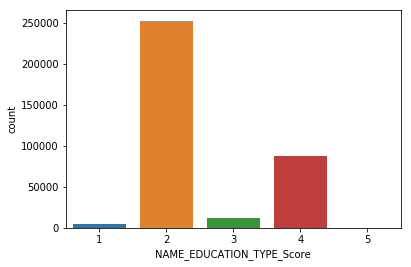

In [59]:
sns.countplot(data2.NAME_EDUCATION_TYPE_Score)

In [60]:
data2.NAME_FAMILY_STATUS.value_counts()

Married                 228715
Single / not married     52480
Civil marriage           34036
Separated                22725
Widow                    18297
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

分成兩類有結婚跟單身就好

#### Change old feature: NAME_FAMILY_STATUS

Unknown歸類於Married

In [61]:
data2['NAME_FAMILY_STATUS'].replace(['Married','Single / not married','Civil marriage','Separated','Widow','Unknown'],['Married','Single','Married','Single','Single','Married'],inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [62]:
data2.NAME_FAMILY_STATUS.value_counts()

Married    262753
Single      93502
Name: NAME_FAMILY_STATUS, dtype: int64

In [63]:
data2.NAME_HOUSING_TYPE.value_counts()

House / apartment      316513
With parents            17074
Municipal apartment     12800
Rented apartment         5599
Office apartment         3024
Co-op apartment          1245
Name: NAME_HOUSING_TYPE, dtype: int64

In [64]:
data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      288253
Family              46030
Spouse, partner     12818
Children             3675
Other_B              1981
Other_A               975
Group of people       320
Name: NAME_TYPE_SUITE, dtype: int64

分類成有人陪和沒人陪

In [65]:
data2.NAME_TYPE_SUITE.unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [66]:
#取代遺漏值
data2['NAME_TYPE_SUITE'].replace([np.nan],['Unaccompanied'],inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [67]:
#check missing value
data2.NAME_TYPE_SUITE.isnull().sum()

0

#### Change old feature: NAME_TYPE_SUITE

In [68]:
data2['NAME_TYPE_SUITE'].replace(['Unaccompanied','Family','Spouse, partner','Children','Other_B','Other_A','Group of people'],['Unaccompanied','Accompanied','Accompanied','Accompanied','Accompanied','Accompanied','Accompanied'],inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


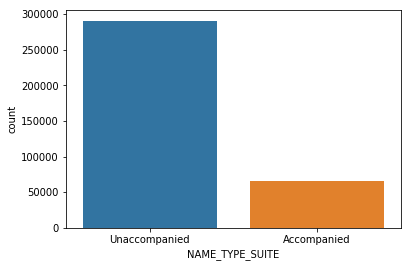

In [69]:
sns.countplot(data2['NAME_TYPE_SUITE'])

搞不懂這兩個變數，先不使用

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


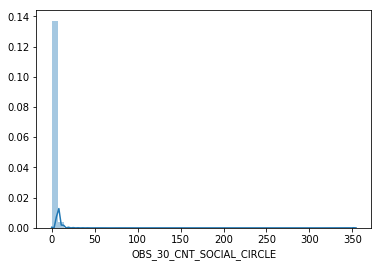

In [70]:
sns.distplot(data2.OBS_30_CNT_SOCIAL_CIRCLE.dropna())

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


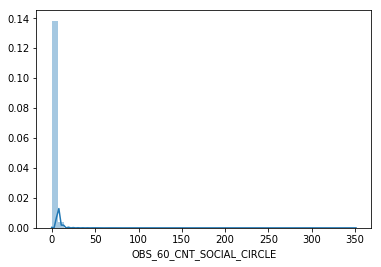

In [71]:
sns.distplot(data2.OBS_60_CNT_SOCIAL_CIRCLE.dropna())

太多細項，不採用

In [72]:
data2.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    78832
XNA                       64648
Self-employed             44332
Other                     19390
Medicine                  12909
Business Entity Type 2    12032
Government                11912
School                    10180
Trade: type 7              9134
Kindergarten               7918
Construction               7760
Business Entity Type 1     6871
Transport: type 4          6282
Trade: type 3              4070
Industry: type 9           3867
Industry: type 3           3767
Security                   3719
Housing                    3393
Military                   3164
Industry: type 11          3120
Bank                       2881
Police                     2782
Agriculture                2746
Transport: type 2          2652
Postal                     2451
Security Ministries        2315
Trade: type 2              2142
Restaurant                 2095
Services                   1877
University                 1548
Industry: type 7           1524
Transpor

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


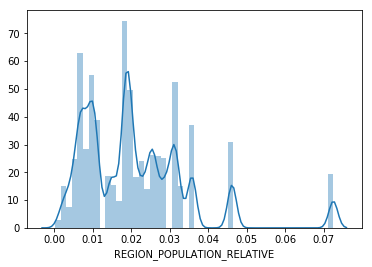

In [73]:
sns.distplot(data2.REGION_POPULATION_RELATIVE)

#### 取log函數再加上絕對值

In [74]:
data2['REGION_POPULATION_RELATIVE_Log'] = (data2['REGION_POPULATION_RELATIVE']).map(lambda x : np.log(x) if x > 0 else 0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


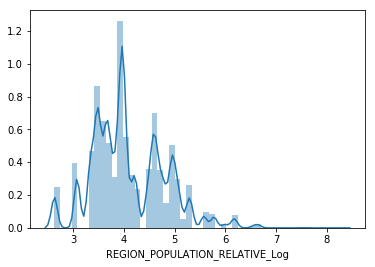

In [75]:
data2['REGION_POPULATION_RELATIVE_Log']=abs(data2.REGION_POPULATION_RELATIVE_Log)
sns.distplot(data2['REGION_POPULATION_RELATIVE_Log'])


In [76]:
data2['Region_POPULATION_4']=pd.qcut(data2['REGION_POPULATION_RELATIVE_Log'],4)
data2['Region_POPULATION_4'].value_counts()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(2.623, 3.552]    92597
(3.552, 3.971]    90440
(3.971, 4.605]    87007
(4.605, 8.282]    86211
Name: Region_POPULATION_4, dtype: int64

#### Create a new feature: Region_POPULATION_4_Flag

In [77]:
data2['Region_POPULATION_4_Flag']=data2['Region_POPULATION_4'].astype(str).map({'(2.623, 3.552]':1,'(3.552, 3.971]':2,'(3.971, 4.605]':3,'(4.605, 8.282]':4})

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [78]:
data2.Region_POPULATION_4_Flag.value_counts()

1    92597
2    90440
3    87007
4    86211
Name: Region_POPULATION_4_Flag, dtype: int64

#### Create a new feature: Region_rating_cut

In [79]:
data2['Region_rating']=(data2.REGION_RATING_CLIENT+data2.REGION_RATING_CLIENT_W_CITY).astype(float)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


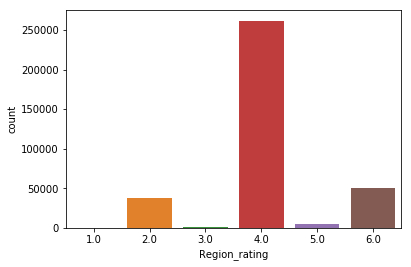

In [80]:
sns.countplot(data2['Region_rating'])

In [81]:
bins = [min(data2['Region_rating'])-1,3,4,max(data2['Region_rating'])+1]
labels = [1,2,3]
data2['Region_rating_cut']=pd.cut(data2['Region_rating'], bins, right=False, labels=labels)
data2['Region_rating_cut'].value_counts()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


3    316781
1     37962
2      1512
Name: Region_rating_cut, dtype: int64

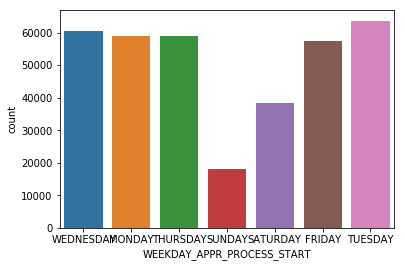

In [82]:
sns.countplot(data2.WEEKDAY_APPR_PROCESS_START)

In [83]:
data2.groupby(['WEEKDAY_APPR_PROCESS_START'])['TARGET'].aggregate('mean')

WEEKDAY_APPR_PROCESS_START
FRIDAY       0.081469
MONDAY       0.077572
SATURDAY     0.078873
SUNDAY       0.079291
THURSDAY     0.081003
TUESDAY      0.083505
WEDNESDAY    0.081604
Name: TARGET, dtype: float64

In [84]:
data2.columns

Index(['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'CODE_GENDER', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_EMAIL', 'FLAG_EMP_PHONE', 'FLAG_MOBIL', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_PHONE', 'FLAG_WORK_PHONE',
   

In [85]:
data2=data2.drop(columns=['AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR'])

In [86]:
data2=data2.drop(columns=['DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'])

In [87]:
data2=data2.drop(columns=['FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_EMAIL', 'FLAG_EMP_PHONE', 'FLAG_MOBIL', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_PHONE', 'FLAG_WORK_PHONE'])

In [88]:
data2=data2.drop(columns=['LIVE_CITY_NOT_WORK_CITY', 'LIVE_REGION_NOT_WORK_REGION','OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY'])

In [89]:
data2.shape

(356255, 40)

In [90]:
data2.columns

Index(['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'CODE_GENDER', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_2', 'HOUR_APPR_PROCESS_START', 'NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE', 'ORGANIZATION_TYPE', 'REGION_POPULATION_RELATIVE', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'SK_ID_CURR', 'TARGET', 'WEEKDAY_APPR_PROCESS_START', 'TERM', 'Dream_and_Reality', 'Over_Expected', 'AMT_REQ', 'Family_Size', 'DAYS_Sum', 'Flag_Sum', 'HOUR', 'HOUR_Score', 'Live_Score', 'NAME_EDUCATION_TYPE_Score', 'REGION_POPULATION_RELATIVE_Log', 'Region_POPULATION_4', 'Region_POPULATION_4_Flag', 'Region_rating', 'Region_rating_cut'], dtype='object')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


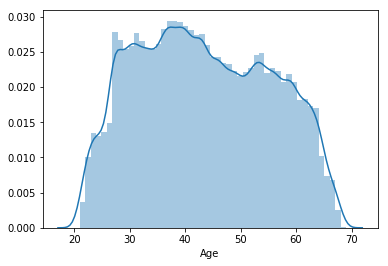

In [91]:
data2['Age']=(abs(data2.DAYS_BIRTH)/365).astype(int)
sns.distplot(data2.Age)

In [92]:
data2.groupby(['TARGET'])['Age'].aggregate('mean')

TARGET
0.0    43.713123
1.0    40.279960
Name: Age, dtype: float64

In [93]:
data2['Seniority']=(abs(data2.DAYS_EMPLOYED)/365).astype(int)
data2['Seniority'][data2['Seniority']>=1000]=None

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [94]:
data2.Seniority.isnull().sum()

64648

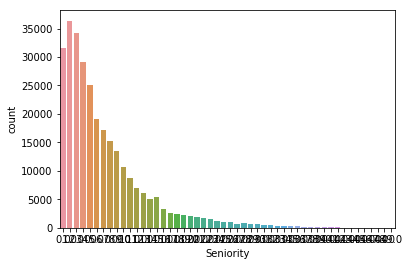

In [95]:
sns.countplot(data2.Seniority)

In [96]:
data2.groupby(['TARGET'])['Seniority'].aggregate('mean')

TARGET
0.0    6.184697
1.0    4.479276
Name: Seniority, dtype: float64

In [97]:
data2['TARGET'][~data2.Seniority.isnull()].mean()

0.0865997453765215

In [98]:
data2['TARGET'][data2.Seniority.isnull()].mean()

0.05399646043269404

In [99]:
median=data2['Seniority'].median()
median

4.0

In [100]:
data2['Seniority']=data2['Seniority'].fillna(median)

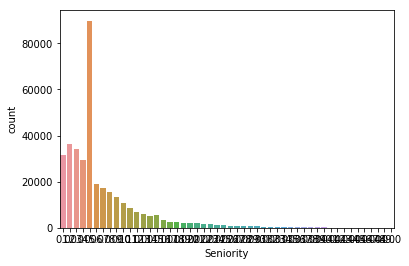

In [101]:
sns.countplot(data2.Seniority)

In [102]:
data2.groupby(['TARGET'])['Seniority'].aggregate('mean')

TARGET
0.0    5.779855
1.0    4.421551
Name: Seniority, dtype: float64

In [103]:
feature_selection=['AMT_ANNUITY','AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL','CODE_GENDER',
                   'Age','EXT_SOURCE_2','NAME_CONTRACT_TYPE',
                   'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE', 
                   'REGION_POPULATION_RELATIVE','SK_ID_CURR', 'TARGET', 'WEEKDAY_APPR_PROCESS_START', 
                   'TERM','AMT_REQ', 'Family_Size', 'Flag_Sum','HOUR_Score', 'Live_Score','Seniority',
                   'NAME_EDUCATION_TYPE_Score','Region_rating_cut','Over_Expected','Region_POPULATION_4_Flag']

In [104]:
data3=data2[feature_selection]

In [105]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data3['NAME_INCOME_TYPE_Flag'] = label.fit_transform(data3['NAME_INCOME_TYPE'])
data3['WEEKDAY_Flag']=label.fit_transform(data3['WEEKDAY_APPR_PROCESS_START'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [106]:
data3= pd.get_dummies(data3, columns=['CODE_GENDER','NAME_CONTRACT_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','NAME_TYPE_SUITE'])
data3.columns

Index(['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'Age', 'EXT_SOURCE_2', 'NAME_INCOME_TYPE', 'REGION_POPULATION_RELATIVE', 'SK_ID_CURR', 'TARGET', 'WEEKDAY_APPR_PROCESS_START', 'TERM', 'AMT_REQ', 'Family_Size', 'Flag_Sum', 'HOUR_Score', 'Live_Score', 'Seniority', 'NAME_EDUCATION_TYPE_Score', 'Region_rating_cut', 'Over_Expected', 'Region_POPULATION_4_Flag', 'NAME_INCOME_TYPE_Flag', 'WEEKDAY_Flag', 'CODE_GENDER_F', 'CODE_GENDER_M', 'NAME_CONTRACT_TYPE_Cash loans', 'NAME_CONTRACT_TYPE_Revolving loans', 'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Single', 'NAME_HOUSING_TYPE_Co-op apartment', 'NAME_HOUSING_TYPE_House / apartment', 'NAME_HOUSING_TYPE_Municipal apartment', 'NAME_HOUSING_TYPE_Office apartment', 'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents', 'NAME_TYPE_SUITE_Accompanied', 'NAME_TYPE_SUITE_Unaccompanied'], dtype='object')

In [107]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 48743
Data columns (total 38 columns):
AMT_ANNUITY                              356255 non-null float64
AMT_CREDIT                               356255 non-null float64
AMT_GOODS_PRICE                          356255 non-null float64
AMT_INCOME_TOTAL                         356255 non-null float64
Age                                      356255 non-null int64
EXT_SOURCE_2                             356255 non-null float64
NAME_INCOME_TYPE                         356255 non-null object
REGION_POPULATION_RELATIVE               356255 non-null float64
SK_ID_CURR                               356255 non-null int64
TARGET                                   307511 non-null float64
WEEKDAY_APPR_PROCESS_START               356255 non-null object
TERM                                     356255 non-null float64
AMT_REQ                                  356255 non-null float64
Family_Size                              356255 non

In [108]:
data3=data3.drop(columns=['NAME_INCOME_TYPE','WEEKDAY_APPR_PROCESS_START'])

In [109]:
data3['Region_rating_cut']=data3.Region_rating_cut.astype(int)
data3.Region_rating_cut.dtype

dtype('int64')

In [110]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 48743
Data columns (total 36 columns):
AMT_ANNUITY                              356255 non-null float64
AMT_CREDIT                               356255 non-null float64
AMT_GOODS_PRICE                          356255 non-null float64
AMT_INCOME_TOTAL                         356255 non-null float64
Age                                      356255 non-null int64
EXT_SOURCE_2                             356255 non-null float64
REGION_POPULATION_RELATIVE               356255 non-null float64
SK_ID_CURR                               356255 non-null int64
TARGET                                   307511 non-null float64
TERM                                     356255 non-null float64
AMT_REQ                                  356255 non-null float64
Family_Size                              356255 non-null float64
Flag_Sum                                 356255 non-null int64
HOUR_Score                               356255 non

In [111]:
pd.set_option('display.width', 1000, 'display.max_rows', 1000)
data3.apply(lambda x:sum(x.isnull()))

AMT_ANNUITY                                  0
AMT_CREDIT                                   0
AMT_GOODS_PRICE                              0
AMT_INCOME_TOTAL                             0
Age                                          0
EXT_SOURCE_2                                 0
REGION_POPULATION_RELATIVE                   0
SK_ID_CURR                                   0
TARGET                                   48744
TERM                                         0
AMT_REQ                                      0
Family_Size                                  0
Flag_Sum                                     0
HOUR_Score                                   0
Live_Score                                   0
Seniority                                    0
NAME_EDUCATION_TYPE_Score                    0
Region_rating_cut                            0
Over_Expected                                0
Region_POPULATION_4_Flag                     0
NAME_INCOME_TYPE_Flag                        0
WEEKDAY_Flag 

### 2. Split Dataset

In [112]:
dataTrain = data3[pd.notnull(data['TARGET'])].sort_values(by=["SK_ID_CURR"])
dataTest = data3[~pd.notnull(data['TARGET'])].sort_values(by=["SK_ID_CURR"])

In [113]:
dataTrain.to_csv('train_modified.csv',index=False)
dataTest.to_csv('test_modified.csv',index=False)
dataTrain.shape, dataTest.shape

((307511, 36), (48744, 36))

In [114]:
dataTrain.columns

Index(['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'Age', 'EXT_SOURCE_2', 'REGION_POPULATION_RELATIVE', 'SK_ID_CURR', 'TARGET', 'TERM', 'AMT_REQ', 'Family_Size', 'Flag_Sum', 'HOUR_Score', 'Live_Score', 'Seniority', 'NAME_EDUCATION_TYPE_Score', 'Region_rating_cut', 'Over_Expected', 'Region_POPULATION_4_Flag', 'NAME_INCOME_TYPE_Flag', 'WEEKDAY_Flag', 'CODE_GENDER_F', 'CODE_GENDER_M', 'NAME_CONTRACT_TYPE_Cash loans', 'NAME_CONTRACT_TYPE_Revolving loans', 'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Single', 'NAME_HOUSING_TYPE_Co-op apartment', 'NAME_HOUSING_TYPE_House / apartment', 'NAME_HOUSING_TYPE_Municipal apartment', 'NAME_HOUSING_TYPE_Office apartment', 'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents', 'NAME_TYPE_SUITE_Accompanied', 'NAME_TYPE_SUITE_Unaccompanied'], dtype='object')

In [115]:
dataTest.columns

Index(['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'Age', 'EXT_SOURCE_2', 'REGION_POPULATION_RELATIVE', 'SK_ID_CURR', 'TARGET', 'TERM', 'AMT_REQ', 'Family_Size', 'Flag_Sum', 'HOUR_Score', 'Live_Score', 'Seniority', 'NAME_EDUCATION_TYPE_Score', 'Region_rating_cut', 'Over_Expected', 'Region_POPULATION_4_Flag', 'NAME_INCOME_TYPE_Flag', 'WEEKDAY_Flag', 'CODE_GENDER_F', 'CODE_GENDER_M', 'NAME_CONTRACT_TYPE_Cash loans', 'NAME_CONTRACT_TYPE_Revolving loans', 'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Single', 'NAME_HOUSING_TYPE_Co-op apartment', 'NAME_HOUSING_TYPE_House / apartment', 'NAME_HOUSING_TYPE_Municipal apartment', 'NAME_HOUSING_TYPE_Office apartment', 'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents', 'NAME_TYPE_SUITE_Accompanied', 'NAME_TYPE_SUITE_Unaccompanied'], dtype='object')

In [116]:
dataTest=dataTest.drop(columns=['TARGET'])
dataTest.to_csv('test_modified.csv',index=False)
dataTest.shape

(48744, 35)

## Change to see LightGBM GridSearchCV